## Data Science - Project for Beginner
* Author: Anh Mai (ANDY)
* Email: <a>andymai.ca@aol.com </a>
* Date: July 2017
* Capital of Silicon Valley - San Jose, California, USA
<br>If you have feedback, please send me an email. Thank you and enjoy!

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## This practice is to import data, follow 5 core steps to analyze data and apply machine learning algorithms
1. Exploratory analysis (Explore data)
2. Data cleaning (Clean up data)
3. Features engineering (Optimize data)
4. Algorithm selection (Key to success)
5. Model training (Maximum performance)

# STEP 01: EXPLORATORY ANALYSIS (Explore Data)

In [2]:
df = pd.read_csv('adult.data', header=-1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Create headers for our data

In [7]:
df.columns = headers
df.head()

,Age,Workclass,Final-weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gen,Capital-loss,Hour-per-week,Nationality,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


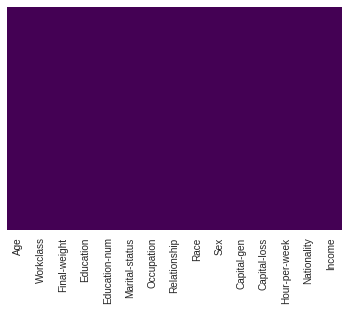

In [8]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

==> No NaN values in the entire table

## Visualize categorical features
### Determine spare classes - EDUCATION column

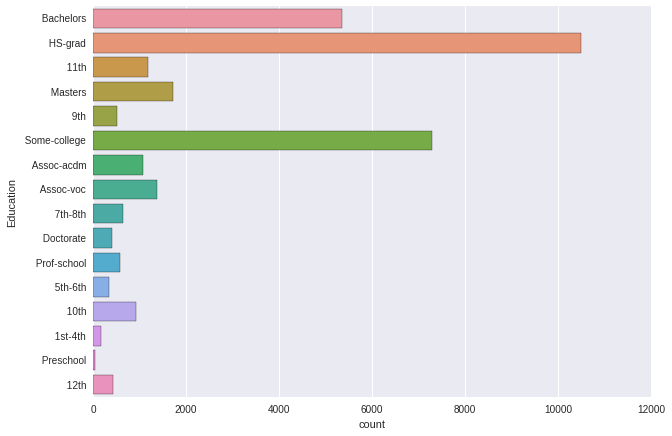

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(y='Education',data=df)

In [10]:
def Education_fill(x):
    if x == u' Preschool' or x == u' 1st-4th' or x == u' 5th-6th' or x == u' 7th-8th' or x == u' 9th' or x == u' 10th' or x == u' 11th' or x == u' 12th':
        return u' No_HS_Grad'
    elif x == u' Doctorate' or x == u' Prof-school':
        return u' Higher_Education'
    elif x == u' Assoc-voc' or x == u' Assoc-acdm':
        return u' Associate_degree'
    else:
        return x

### Understand the type of values inside Education feature

In [11]:
demo = pd.get_dummies(df['Education'])

In [12]:
demo.columns

Index([u' 10th', u' 11th', u' 12th', u' 1st-4th', u' 5th-6th', u' 7th-8th',
       u' 9th', u' Assoc-acdm', u' Assoc-voc', u' Bachelors', u' Doctorate',
       u' HS-grad', u' Masters', u' Preschool', u' Prof-school',
       u' Some-college'],
      dtype='object')

### Apply the Edu_num function to group needed classes as well as sparse classes

In [13]:
df['Education'] = df['Education'].apply(Education_fill,1)

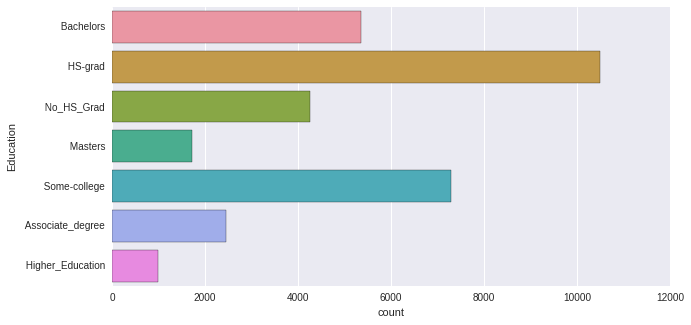

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y='Education', data=df)

### Determine spare classes - WORKCLASS column

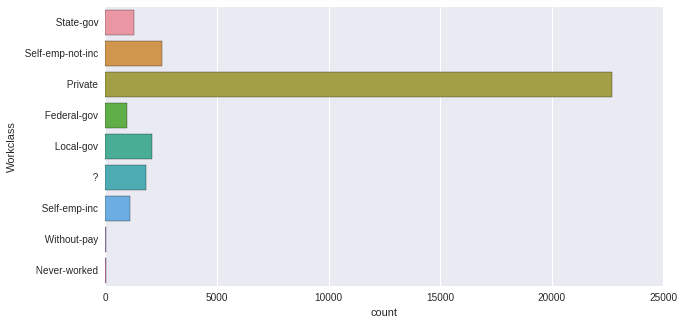

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(y='Workclass', data=df)

### Understand the type of values inside Workclass feature

In [17]:
def Workclass_fill(x):
    if x == u' Without-pay' or x == u' Never-worked' or x == u' ?':
        return u' Unknown'
    elif x == u' Federal-gov' or x == u' State-gov':
        return u' State'
    else:
        return x

In [18]:
df['Workclass'] = df['Workclass'].apply(Workclass_fill,1)

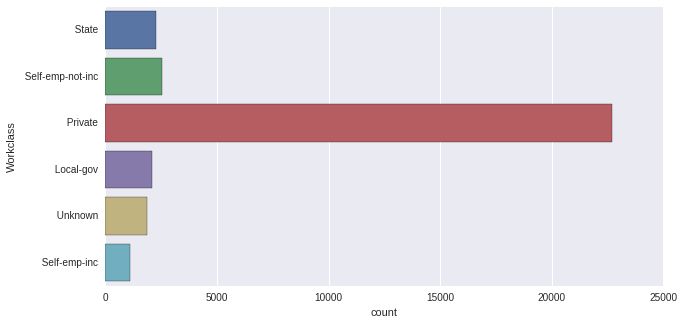

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(y='Workclass', data=df)

### Determine spare classes - Marital-status column

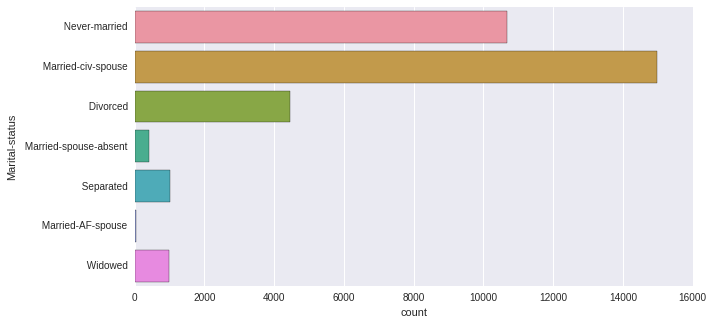

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y='Marital-status', data=df)

### Understand the type of values inside Marital-status feature

In [22]:
def Marriage_fill(x):
    if x == u' Married-spouse-absent' or x == u' Married-civ-spouse' or x == u' Married-AF-spouse':
        return u' Married'
    else:
        return x

In [23]:
df['Marital-status'] = df['Marital-status'].apply(Marriage_fill,1)

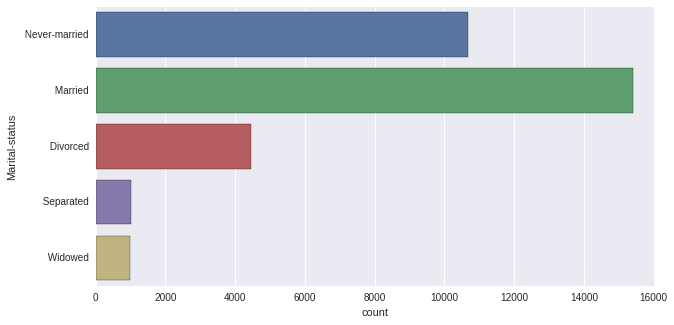

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y='Marital-status', data=df)

### Determine spare classes - Occupation column

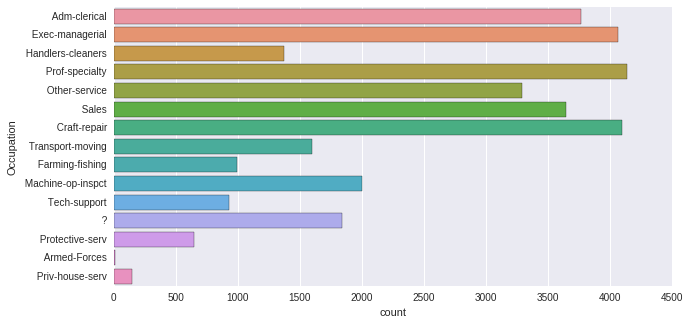

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(y='Occupation', data=df)

### Understand the type of values inside Occupation feature

In [28]:
df['Occupation'] = df['Occupation'].apply(Occupation_fill,1)

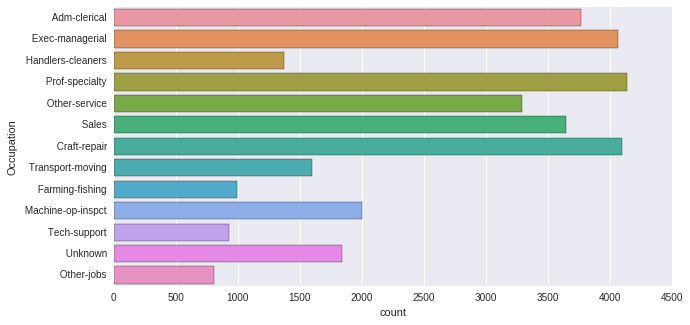

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(y='Occupation', data=df)

### Determine spare classes - Relationchip column

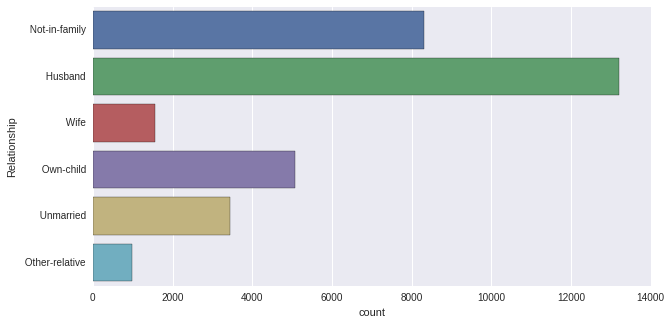

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(y='Relationship', data=df)

### Determine spare classes - Race column

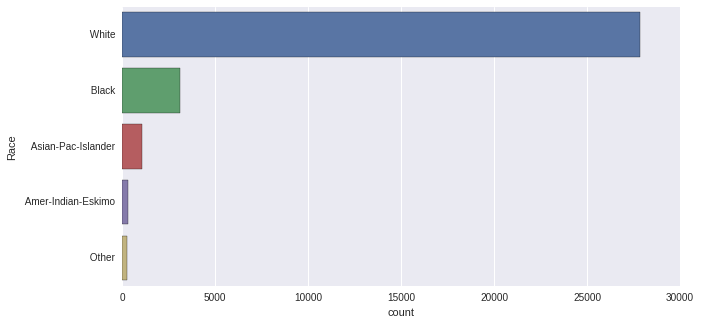

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(y='Race', data=df)

* Sparse classes: Amer-Indian-Eskimo, Other
* Need to group:
    * Amer-Indian-Eskimo, Other, Asian-Pac-Islander ==> Others

### Understand the type of values inside Race feature

In [34]:
df['Race'] = df['Race'].apply(Race_fill,1)

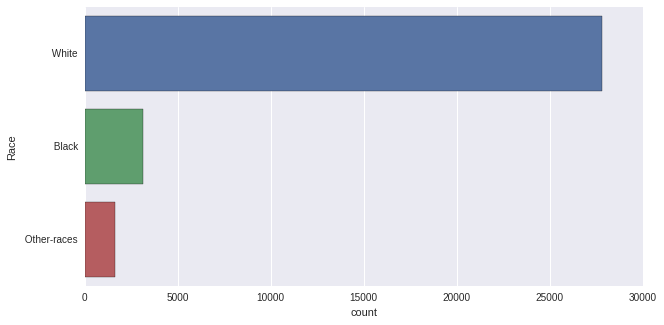

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(y='Race', data=df)

### Determine spare classes - Nationality column

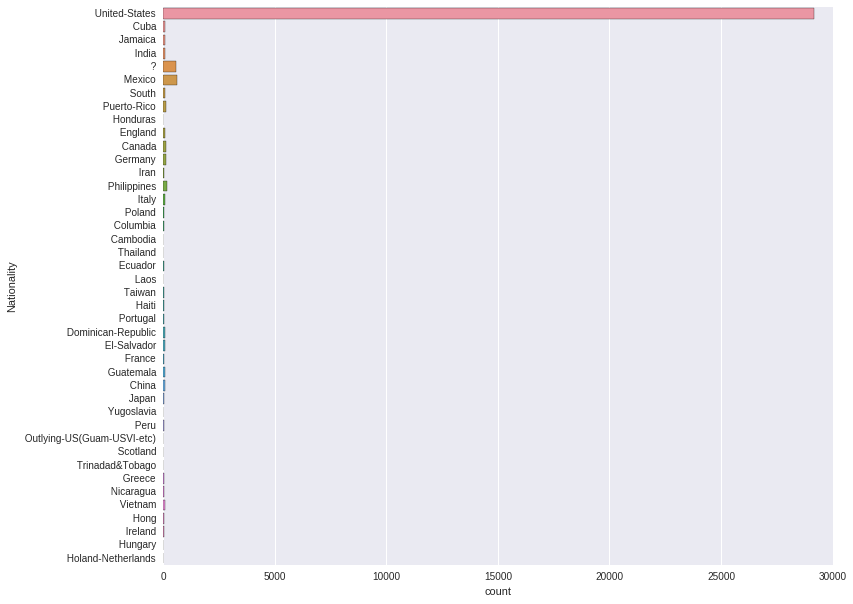

In [36]:
plt.figure(figsize=(12,10))
sns.countplot(y='Nationality', data=df)

### Understand the type of values inside Nationality feature

In [39]:
df['Nationality'] = df['Nationality'].apply(Nationality_fill,1)

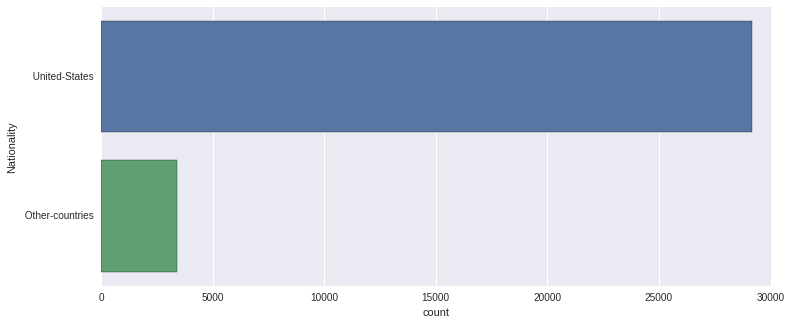

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(y='Nationality', data=df)

## Use pairplot to see the distribution among numeric features

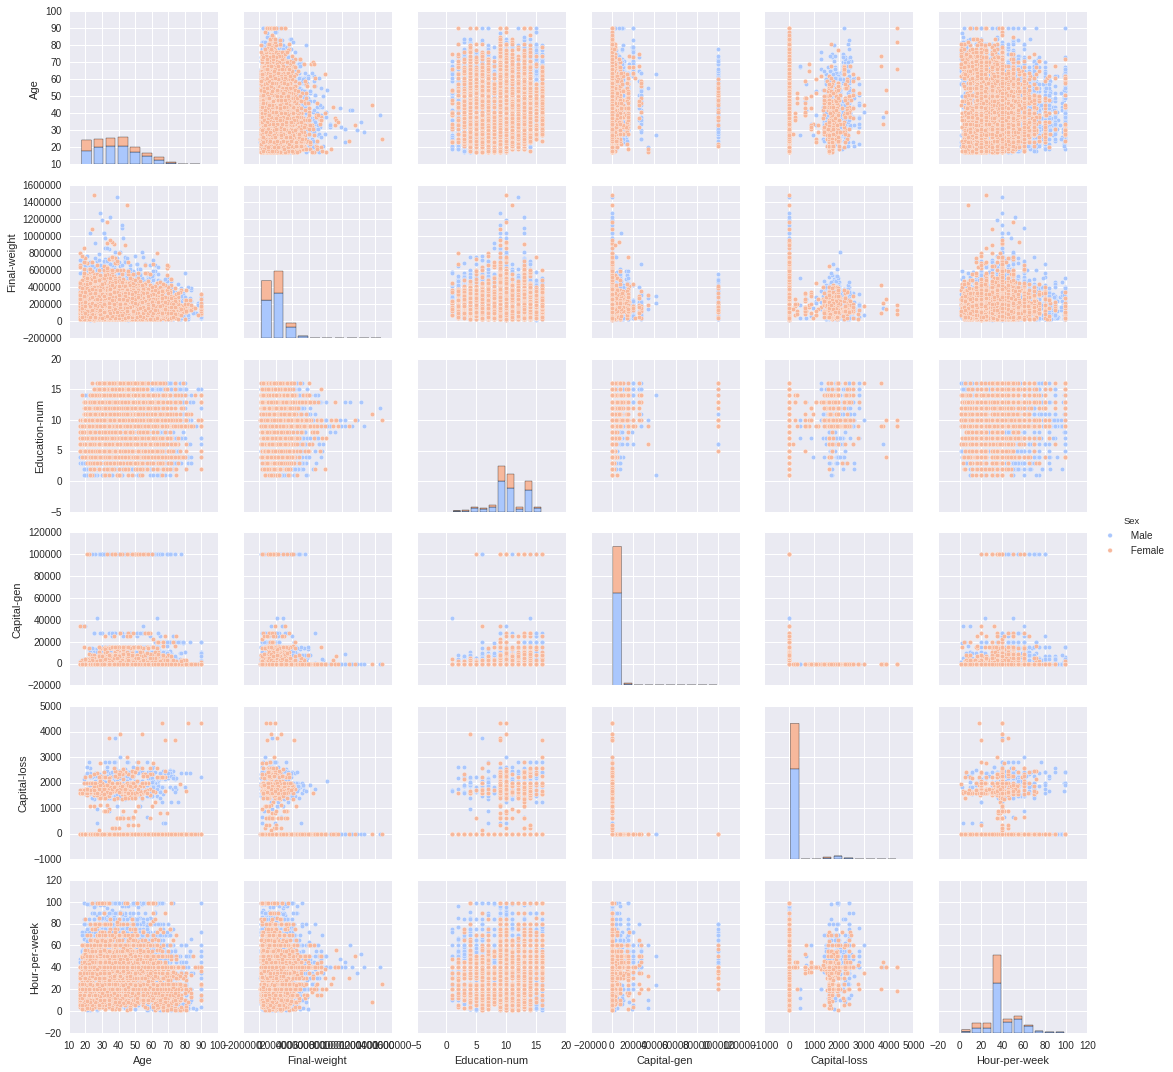

In [41]:
sns.pairplot(df, hue='Sex',palette='coolwarm')

## Observe the relations between Sex, Income, and Education-num

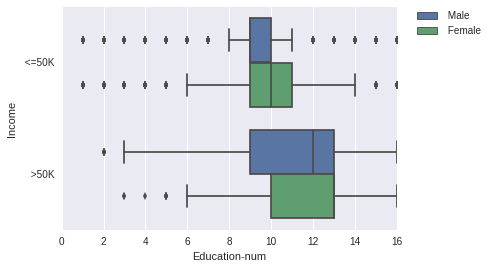

In [42]:
sns.boxplot(x='Education-num', y='Income', data=df, hue='Sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Use heatmap to observe the correlations between numeric features

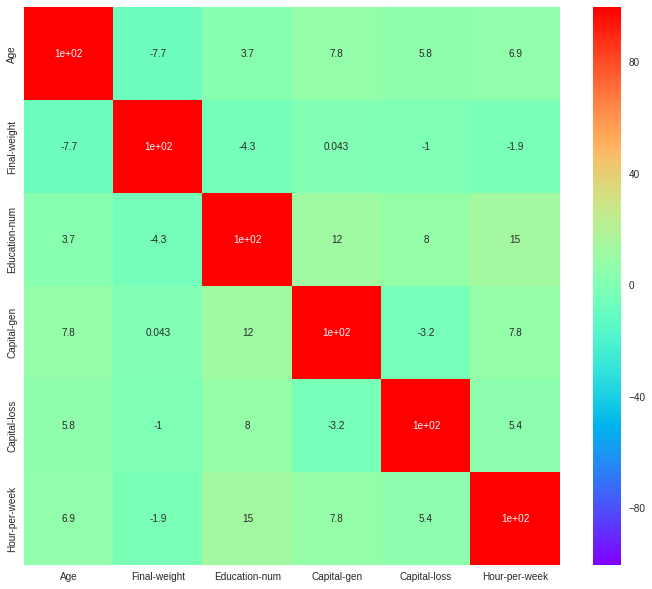

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr()*100,cmap='rainbow', annot=True)

# STEP 02: DATA CLEANING (Clean up our data)

In [44]:
df.head()

,Age,Workclass,Final-weight,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gen,Capital-loss,Hour-per-week,Nationality,Income
0,39,State,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,No_HS_Grad,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Other-countries,<=50K


# STEP 03: FEATURE ENGINEERING
What to do in this step:
1. Create interaction features (based on existing features)
2. Combine sparse classes
3. Convert categorical features into numeric features (i.e. Using dummy variables)

In [46]:
df.head()

,Age,Workclass,Final-weight,Education,Education-num,Marital-status,Occupation,Race,Sex,Capital-gen,Capital-loss,Hour-per-week,Nationality,Income
0,39,State,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,No_HS_Grad,7,Married,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Black,Female,0,0,40,Other-countries,<=50K


In [47]:
race = pd.get_dummies(df['Race'], drop_first=True)
sex = pd.get_dummies(df['Sex'], drop_first=True)
national = pd.get_dummies(df['Nationality'], drop_first=True)

In [48]:
def income_fill(x):
    if x == u' <=50K':
        return 0
    else:
        return 1

In [49]:
df['Income'] = df['Income'].apply(income_fill,1)

In [50]:
df.drop(['Race', 'Sex', 'Nationality'], 1, inplace=True)

In [51]:
df = pd.concat([df,race,sex,national],1)

In [52]:
df.head()

,Age,Workclass,Final-weight,Education,Education-num,Marital-status,Occupation,Capital-gen,Capital-loss,Hour-per-week,Income,Other-races,White,Male,United-States
0,39,State,77516,Bachelors,13,Never-married,Adm-clerical,2174,0,40,0,0,1,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,0,0,13,0,0,1,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,0,0,40,0,0,1,1,1
3,53,Private,234721,No_HS_Grad,7,Married,Handlers-cleaners,0,0,40,0,0,0,1,1
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,0,0,40,0,0,0,0,0


### Create converter functions to convert some categorical features into numeric ones

In [53]:
def workclass_convert(x):
    if x == u' Local-gov':
        return 1
    elif x == u' Private':
        return 2
    elif x == u' Self-emp-inc':
        return 3
    elif x == u' Self-emp-not-inc':
        return 4
    elif x == u' State':
        return 5
    else:
        return 0

def education_convert(x):
    if x == u' Higher_Education' or x == u' Masters':
        return 1
    elif x == u' Associate_degree' or x == u' Bachelors' or x == u' Some-college':
        return 2
    else:
        return 3
    
def marriage_convert(x):
    if x == u' Divorced' or x == u' Widowed' or x == u' Never-married' or x == u' Separated':
        return 1
    else:
        return 0
    
def occupation_convert(x):
    if x == u' Unknown':
        return 0
    elif x == u' Exec-managerial':
        return 1
    elif x == u' Tech-support':
        return 2
    else:
        return 3

In [54]:
df['Workclass'] = df['Workclass'].apply(workclass_convert,1)
df['Education'] = df['Education'].apply(education_convert,1)
df['Marital-status'] = df['Marital-status'].apply(marriage_convert,1)
df['Occupation'] = df['Occupation'].apply(occupation_convert,1)

In [55]:
df.head()

,Age,Workclass,Final-weight,Education,Education-num,Marital-status,Occupation,Capital-gen,Capital-loss,Hour-per-week,Income,Other-races,White,Male,United-States
0,39,5,77516,2,13,1,3,2174,0,40,0,0,1,1,1
1,50,4,83311,2,13,0,1,0,0,13,0,0,1,1,1
2,38,2,215646,3,9,1,3,0,0,40,0,0,1,1,1
3,53,2,234721,3,7,0,3,0,0,40,0,0,0,1,1
4,28,2,338409,2,13,0,3,0,0,40,0,0,0,0,0


### Create a new feature named DEBT based on the Capital-gen and Capital-loss features

In [57]:
df['Debt'] = df[['Capital-gen', 'Capital-loss']].apply(debt,1)

### Create a new feature named OVERTIME based on the Hour-per-week feature

In [59]:
df['Overtime'] = df['Hour-per-week'].apply(overtime,1)

## Heatmap to show the correlations of all features inside the table

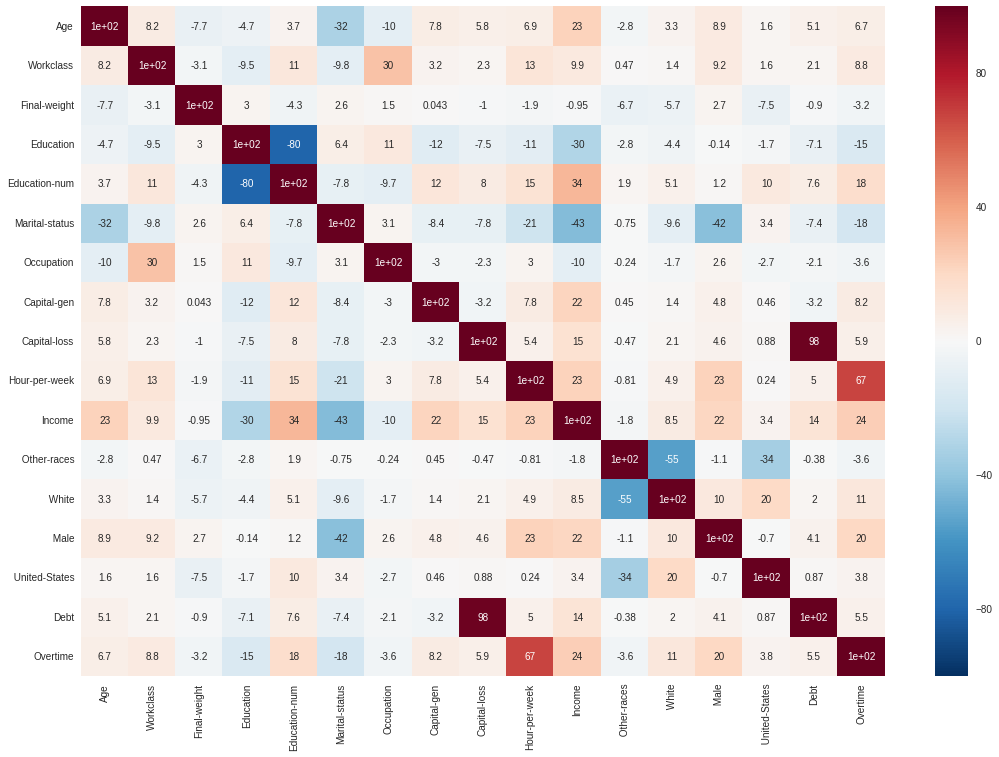

In [60]:
plt.figure(figsize=(18,12))
sns.heatmap(data=df.corr()*100,annot=True)

# STEP 04: ALGORITHMS SELECTION + STEP 05: MODEL TRAINING

In [61]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
X = df.drop(['Income'],1)

In [63]:
y = df['Income']

In [64]:
k_fold = KFold(n_splits=10, random_state=42, shuffle=True)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## Logistic Regression

In [66]:
lr = LogisticRegression()

In [67]:
cross_val_score(lr, X, y, cv=10, n_jobs=-1).mean()

0.79782566221006512

In [68]:
cross_val_score(lr, X, y, cv=10, n_jobs=-1).std()

0.004716372671241093

#### The average cv-score using cross-validation score is 0.7978 +/- 0.0047

In [69]:
pred_lr = cross_val_predict(lr,X,y,cv=k_fold,n_jobs=-1)

In [70]:
lr_score = accuracy_score(y,pred_lr)
print(accuracy_score(y,pred_lr))

0.797856331194


#### The average cv-score using cv prediction is 0.7977

### Our model is good to go, apply to X/y train/test dataset to see the result

In [71]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
pred_lr_no_cv = lr.predict(X_test)

In [73]:
print(classification_report(pred_lr_no_cv,y_test))

             precision    recall  f1-score   support

          0       0.97      0.81      0.88     11907
          1       0.26      0.73      0.39      1118

avg / total       0.91      0.80      0.84     13025



## Deciscion Trees

In [74]:
dtree = DecisionTreeClassifier()

In [75]:
cross_val_score(dtree, X, y, cv=10, n_jobs=-1).mean()

0.81179946763689481

In [76]:
cross_val_score(dtree, X, y, cv=10, n_jobs=-1).std()

0.0048018781901630345

### The cv-score here is: 0.81 +/- 0.004

In [77]:
pred_dtree = cross_val_predict(dtree,X,y,cv=k_fold,n_jobs=-1)

In [78]:
dtree_result = accuracy_score(y,pred_dtree)
print(accuracy_score(y,pred_dtree))

0.811400141273


### The cv-score in cross-validation prediction function is: 0.812

## Apply to train/test dataset:

In [79]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [80]:
pred_dtree_no_cv = dtree.predict(X_test)

In [81]:
print(classification_report(pred_dtree_no_cv, y_test))

             precision    recall  f1-score   support

          0       0.87      0.88      0.87      9821
          1       0.61      0.60      0.61      3204

avg / total       0.81      0.81      0.81     13025



## Random Forests

In [82]:
rdf = RandomForestClassifier(n_estimators=600)

In [83]:
cross_val_score(rdf, X, y, cv=10, n_jobs=-1).mean()

0.84886840779149664

In [84]:
cross_val_score(dtree, X, y, cv=10, n_jobs=-1).std()

0.0042481400846370023

In [85]:
pred_rdf = cross_val_predict(rdf,X,y,cv=k_fold,n_jobs=-1)

In [86]:
rdf_result = accuracy_score(y,pred_rdf)
print(accuracy_score(y,pred_rdf))

0.850311722613


In [87]:
rdf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [88]:
pred_rdf_no_cv = rdf.predict(X_test)

In [89]:
print(classification_report(pred_rdf_no_cv,y_test))

             precision    recall  f1-score   support

          0       0.92      0.88      0.90     10349
          1       0.61      0.72      0.66      2676

avg / total       0.86      0.85      0.85     13025



## Support Vector Machine (SVM)

### Use the following source code to run the SVM algorithm with K-fold cross-validation.
<code>
    from sklearn.model_selection import GridSearchCV
    param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
    svm_model = SVC()
    grid = GridSearchCV(svm_model,param_grid,refit=True,verbose=3)
    best_para = list()
    score = list()
    
    for train, test in k_fold.split(X):
        grid.fit(X.iloc[train], y[train])
        best_para.append(grid.best_params_)
        score.append(grid.score)

### This is the result of this algorithm. It took over an hour to run and the result seems worse than using those above algorithms.
<img src='SVM.png' />

In [91]:
svm_result = 0.7597

--------------------------------------
# CONCLUSION
--------------------------------------

In [92]:
algo_header = ['Logistic Regression', 'Decision Trees', 'Random Forests', 'Support Vector Machine']

In [93]:
algo_accu = [lr_score,dtree_result,rdf_result,svm_result]

In [96]:
result = pd.DataFrame(index=algo_header,columns=['Accuracy'],data=algo_accu)

In [99]:
result

,Accuracy
Logistic Regression,0.797856
Decision Trees,0.811400
Random Forests,0.850312
Support Vector Machine,0.759700


## From the results above, the winner is Random Forests with ~ 85% accuracy